In [40]:
import yaml
import open3d as o3d
import cv2 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import time
from lse import compute_lse

In [19]:
with open("/home/yeomjy/data/t-less_v2/train_primesense/01/gt.yml", "r") as f:
    gt = yaml.load(f, Loader=yaml.FullLoader)
with open("/home/yeomjy/data/t-less_v2/train_primesense/01/info.yml", "r") as f:
    info = yaml.load(f, Loader=yaml.FullLoader)

In [20]:
mesh = o3d.io.read_triangle_mesh("/home/yeomjy/data/t-less_v2/models_cad/obj_01.ply")

In [26]:
idx = 887

In [35]:
img = cv2.imread(f"/home/yeomjy/data/t-less_v2/train_primesense/01/rgb/{idx:04}.png")

Elapsed time: 0.9895739555358887sec


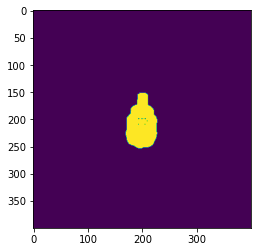

In [39]:
start = time.time()
R = gt[idx][0]['cam_R_m2c']
t = gt[idx][0]['cam_t_m2c']
K = info[idx]['cam_K']
R = np.asarray(R).reshape((3, 3))
K = np.asarray(K).reshape((3, 3))

ext = np.zeros((4, 4))
ext[:3, :3] = R
ext[:3, 3] = t
ext[3, :3] = 0
ext[3, 3] = 1
H, W = img.shape[0], img.shape[1]
C = -np.linalg.inv(R) @ t
rays = o3d.t.geometry.RaycastingScene.create_rays_pinhole(
    o3d.core.Tensor(K),
    o3d.core.Tensor(ext),
    W,
    H
)

canvas = np.zeros((H, W, 1))

mesh_t = o3d.t.geometry.TriangleMesh.from_legacy(mesh)
scene = o3d.t.geometry.RaycastingScene()
mesh_id = scene.add_triangles(mesh_t)

cast = scene.cast_rays(rays)

for y in range(H):
    for x in range(W):
        if (np.any(img[y, x] != 0) and cast['t_hit'][y, x] < np.inf):
            canvas[y, x] = 255
end = time.time()
print(f"Elapsed time: {end - start}sec")
            
plt.imshow(canvas)
    